In [1]:
import pandas as pd
video=pd.read_json("/home/dogacan/Downloads/train.json")
test=pd.read_json("/home/dogacan/Downloads/test.json")

In [2]:
is_turkey=video.is_turkey
dicti={}
for i in range(1195):
    liste=[]
    for frame in video.audio_embedding[i]:
        for value in frame:
            liste.append(value)
    dicti[i]=liste
for i in range(1195):
    while len(dicti[i])<1280:
        dicti[i].extend(dicti[i])
    dicti[i]=dicti[i][:1280]  

audio=pd.DataFrame.from_dict(dicti, orient='index')

        
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import cross_val_score
cross_val_score(model, audio, is_turkey, cv=5).mean()   
    
            
  
    
    
    
    
    
    


0.9364082076345183

In [104]:
vid_id=test.vid_id
testdicti={}
for i in range(1196):
    liste=[]
    for frame in test.audio_embedding[i]:
        for value in frame:
            liste.append(value)
    testdicti[i]=liste
for i in range(1196):
    while len(testdicti[i])<1280:
        testdicti[i].extend(testdicti[i])
    testdicti[i]=testdicti[i][:1280]  

audio_test=pd.DataFrame.from_dict(testdicti, orient='index')
model.fit(audio,is_turkey)
predicted=model.predict(audio_test)


In [105]:
output = pd.DataFrame({'vid_id': vid_id,
                       'is_turkey': predicted})
output.to_csv('/home/dogacan/Downloads/submission_turkey.csv', index=False)

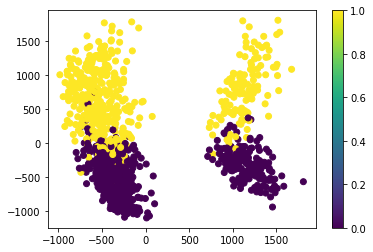

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(audio)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=is_turkey) 
plt.colorbar() 